In [1]:
import pandas as pd #utk mengelola data set
import numpy as np #utk menampilkan array
import matplotlib.pyplot as plt #gambar plot, grafik, chart, tree

In [2]:
df = pd.read_csv("tennis.csv")

In [3]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,False,No
1,D2,Sunny,Hot,High,True,No
2,D3,Cloudy,Hot,High,False,Yes
3,D4,Rainy,Mild,High,False,Yes
4,D5,Rainy,Cool,Normal,False,Yes
5,D6,Rainy,Cool,Normal,True,Yes
6,D7,Cloudy,Cool,Normal,True,Yes
7,D8,Sunny,Mild,High,False,No
8,D9,Sunny,Cool,Normal,False,Yes
9,D10,Rainy,Mild,Normal,False,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     bool  
 5   play      14 non-null     object
dtypes: bool(1), object(5)
memory usage: 702.0+ bytes


In [5]:
col = ['outlook', 'temp', 'humidity', 'wind', 'play']

for i in col :
  print(i, " : ", df[i].unique())

outlook  :  ['Sunny' 'Cloudy' 'Rainy']
temp  :  ['Hot' 'Mild' 'Cool']
humidity  :  ['High' 'Normal']
wind  :  [False  True]
play  :  ['No' 'Yes']


In [7]:
df.describe()

,day,outlook,temp,humidity,wind,play
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D1,Sunny,Mild,High,False,Yes
freq,1,5,6,7,8,10


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_data = ['outlook','temp', 'humidity', 'wind', 'play']

for i in categorical_data:
    print(df[i].unique())
    df[i] = label_encoder.fit_transform(df[i])
    print(df[i].unique())

['Sunny' 'Cloudy' 'Rainy']
[2 0 1]
['Hot' 'Mild' 'Cool']
[1 2 0]
['High' 'Normal']
[0 1]
[False  True]
[0 1]
['No' 'Yes']
[0 1]


In [12]:
df

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,0,0
1,D2,2,1,0,1,0
2,D3,0,1,0,0,1
3,D4,1,2,0,0,1
4,D5,1,0,1,0,1
5,D6,1,0,1,1,1
6,D7,0,0,1,1,1
7,D8,2,2,0,0,0
8,D9,2,0,1,0,1
9,D10,1,2,1,0,1


In [13]:
#drop = hapus kolom
x = np.asarray(df.drop(["day", "play"], axis=1))
y = np.asarray(df["play"])

In [14]:
print(x, y)

[[2 1 0 0]
 [2 1 0 1]
 [0 1 0 0]
 [1 2 0 0]
 [1 0 1 0]
 [1 0 1 1]
 [0 0 1 1]
 [2 2 0 0]
 [2 0 1 0]
 [1 2 1 0]
 [2 2 1 1]
 [0 2 0 1]
 [0 1 1 0]
 [1 2 0 1]] [0 0 1 1 1 1 1 0 1 1 1 1 1 0]


In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(criterion = "entropy")

In [16]:
model.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

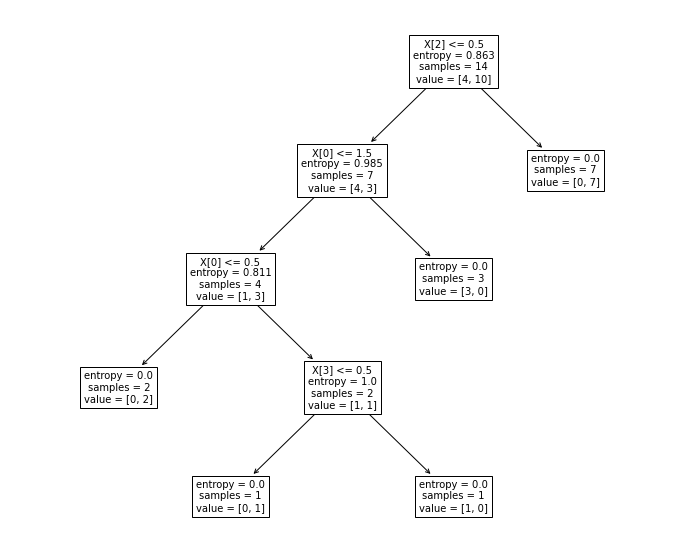

In [17]:
plt.subplots(figsize = (12, 10))
plot_tree(model, fontsize = 10)
plt.show()

In [18]:
d15 = np.array([[1, 3, 2, 1]])

y_15 = model.predict(d15)
print(y_15)

[1]
